In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('recruitment_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [4]:
# Fitur yang akan digunakan pada dataset adalah ExperienceYears, InterviewScore, SkillScore, PersonalityScore, EducationLevel,RecruitmentStrategy
features = ['ExperienceYears', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'EducationLevel', 'RecruitmentStrategy']
target = 'HiringDecision'


In [5]:
# Drop fitur yang tidak diperlukan
df = df[features + [target]]

In [6]:
# Cek missing values
print(df.isnull().sum())

ExperienceYears        0
InterviewScore         0
SkillScore             0
PersonalityScore       0
EducationLevel         0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


In [7]:
df.head()

,ExperienceYears,InterviewScore,SkillScore,PersonalityScore,EducationLevel,RecruitmentStrategy,HiringDecision
0,0,48,78,91,2,1,1
1,12,35,68,80,4,2,1
2,3,20,67,13,2,2,0
3,5,36,27,70,2,3,0
4,6,23,52,85,1,2,0


In [8]:
# cek nilai unique dari ExperienceYears
print(df['ExperienceYears'].unique())

[ 0 12  3  5  6 14 13  2 15  7  1  9  8  4 11 10]


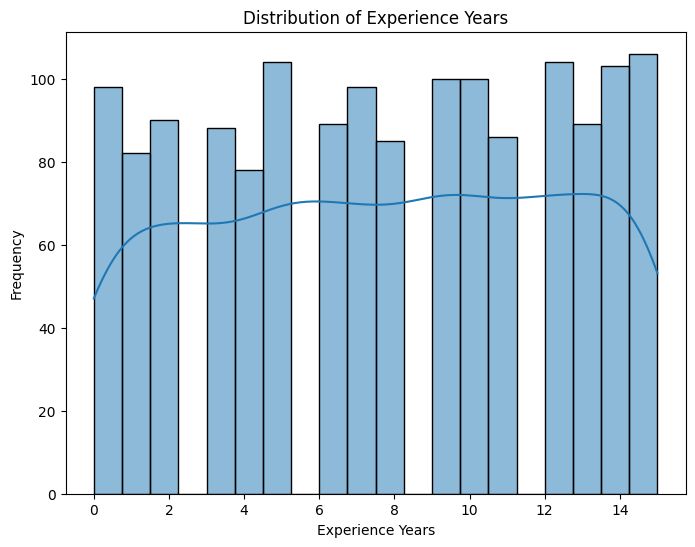

In [9]:
# histogram experience years
plt.figure(figsize=(8, 6))
sns.histplot(df['ExperienceYears'], bins=20, kde=True)
plt.title('Distribution of Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Frequency')
plt.show()

In [10]:
# ubah experience year menjadi junior mid senior
def categorize_experience(years):
    if years < 2:
        return 'Junior'
    elif 2 <= years < 5:
        return 'Mid'
    else:
        return 'Senior'
df['ExperienceLevel'] = df['ExperienceYears'].apply(categorize_experience)
df.drop('ExperienceYears', axis=1, inplace=True)

In [11]:
df.head(
)

,InterviewScore,SkillScore,PersonalityScore,EducationLevel,RecruitmentStrategy,HiringDecision,ExperienceLevel
0,48,78,91,2,1,1,Junior
1,35,68,80,4,2,1,Senior
2,20,67,13,2,2,0,Mid
3,36,27,70,2,3,0,Senior
4,23,52,85,1,2,0,Senior


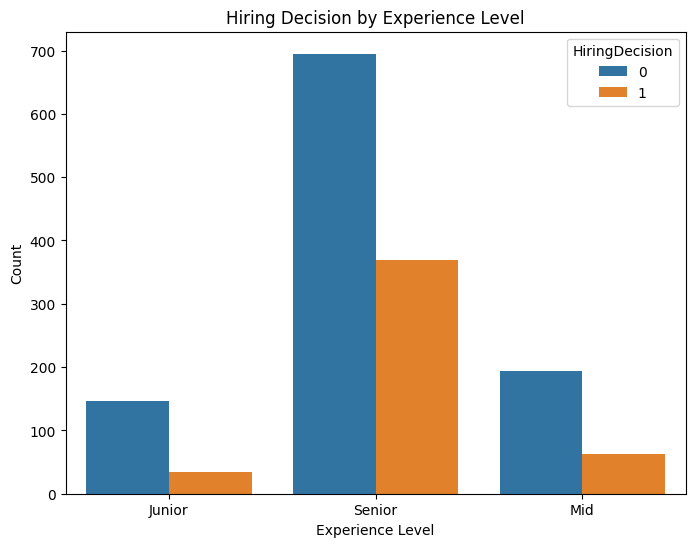

In [15]:
# barplot experiencelevel terhadap hiring decision
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ExperienceLevel', hue='HiringDecision')
plt.title('Hiring Decision by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

In [16]:
# cek nilai unique dari EducationLevel
print(df['EducationLevel'].unique())

[2 4 1 3]


In [17]:
df.head()

,InterviewScore,SkillScore,PersonalityScore,EducationLevel,RecruitmentStrategy,HiringDecision,ExperienceLevel
0,48,78,91,2,1,1,Junior
1,35,68,80,4,2,1,Senior
2,20,67,13,2,2,0,Mid
3,36,27,70,2,3,0,Senior
4,23,52,85,1,2,0,Senior


In [18]:
# OHE untuk fitur EducationLevel, RecruitmentStrategy, ExperienceLevel
df = pd.get_dummies(df, columns=['EducationLevel', 'RecruitmentStrategy', 'ExperienceLevel'], drop_first=True)
df.head()


,InterviewScore,SkillScore,PersonalityScore,HiringDecision,EducationLevel_2,EducationLevel_3,EducationLevel_4,RecruitmentStrategy_2,RecruitmentStrategy_3,ExperienceLevel_Mid,ExperienceLevel_Senior
0,48,78,91,1,True,False,False,False,False,False,False
1,35,68,80,1,False,False,True,True,False,False,True
2,20,67,13,0,True,False,False,True,False,True,False
3,36,27,70,0,True,False,False,False,True,False,True
4,23,52,85,0,False,False,False,True,False,False,True


In [19]:
# ubah true false pada EducationLevel_2, EducationLevel_3, EducationLevel_4, RecruitmentStrategy_2, RecruitmentStrategy_3, ExperienceLevel_Mid, ExperienceLevel_Senior menjadi 1 0
df = df.astype(int)
df.head()

,InterviewScore,SkillScore,PersonalityScore,HiringDecision,EducationLevel_2,EducationLevel_3,EducationLevel_4,RecruitmentStrategy_2,RecruitmentStrategy_3,ExperienceLevel_Mid,ExperienceLevel_Senior
0,48,78,91,1,1,0,0,0,0,0,0
1,35,68,80,1,0,0,1,1,0,0,1
2,20,67,13,0,1,0,0,1,0,1,0
3,36,27,70,0,1,0,0,0,1,0,1
4,23,52,85,0,0,0,0,1,0,0,1


In [20]:
# gunakan standarScaler untuk fitur InterviewScore, SkillScore, PersonalityScore
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['InterviewScore', 'SkillScore', 'PersonalityScore']] = scaler.fit_transform(df[['InterviewScore', 'SkillScore', 'PersonalityScore']])
df.head()

#Simpan scalernya menggunakan joblib
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [21]:
df.head()

,InterviewScore,SkillScore,PersonalityScore,HiringDecision,EducationLevel_2,EducationLevel_3,EducationLevel_4,RecruitmentStrategy_2,RecruitmentStrategy_3,ExperienceLevel_Mid,ExperienceLevel_Senior
0,-0.089598,0.916174,1.418126,1,1,0,0,0,0,0,0
1,-0.543879,0.575386,1.043255,1,0,0,1,1,0,0,1
2,-1.068049,0.541307,-1.240051,0,1,0,0,1,0,1,0
3,-0.508934,-0.821844,0.702463,0,1,0,0,0,1,0,1
4,-0.963215,0.030126,1.213651,0,0,0,0,1,0,0,1


In [22]:
#simpan data yang sudah di preprocess
df.to_csv('recruitment_data_preprocessed.csv', index=False)

In [23]:
# split data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1200, 10) (300, 10) (1200,) (300,)


In [25]:
# simpan data latih dan data uji
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

